In [3]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 41.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=ab1549256aa19c775aedde77f92d96ff53ed028a06333b2651310be4bb92254b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

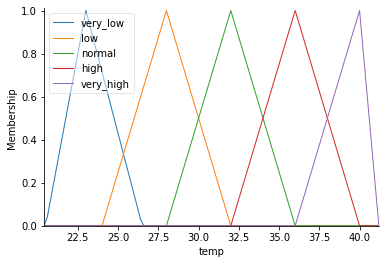

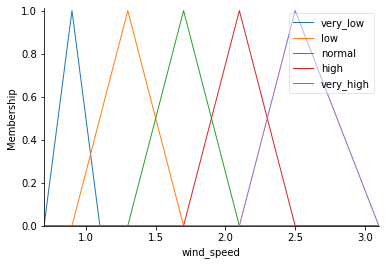

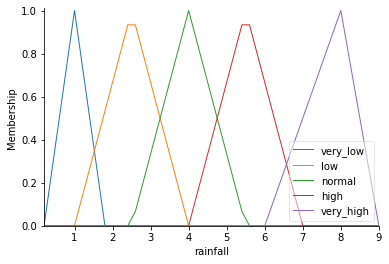

In [5]:
#DU BAO LUONG MUA
temp =ctrl.Antecedent(np.arange(20.4,41.2,0.2),'temp')
wind_speed= ctrl.Antecedent(np.arange(0.7,3.1,0.1),'wind_speed')
rainfall= ctrl.Consequent(np.arange(0.2,9.1,0.2),'rainfall')
#Tao membership function tu dong

#Tao membership function 
temp['very_low']=fuzz.trimf(temp.universe,[20.5,23,26.5])
temp['low']=fuzz.trimf(temp.universe,[24,28,32])
temp['normal']=fuzz.trimf(temp.universe,[28,32,36])
temp['high']=fuzz.trimf(temp.universe,[32,36,40])
temp['very_high']= fuzz.trimf(temp.universe,[36,40,41.2])

wind_speed['very_low']=fuzz.trimf(wind_speed.universe,[0.7,0.9,1.1])
wind_speed['low']=fuzz.trimf(wind_speed.universe,[0.9,1.3,1.7])
wind_speed['normal']=fuzz.trimf(wind_speed.universe,[1.3,1.7,2.1])
wind_speed['high']=fuzz.trimf(wind_speed.universe,[1.7,2.1,2.5])
wind_speed['very_high']=fuzz.trimf(wind_speed.universe,[2.1,2.5,3.1])

rainfall['very_low']=fuzz.trimf(rainfall.universe,[0.2,1,1.8])
rainfall['low']=fuzz.trimf(rainfall.universe,[1,2.5,4])
rainfall['normal']=fuzz.trimf(rainfall.universe,[2.5,4,5.5])
rainfall['high']=fuzz.trimf(rainfall.universe,[4,5.5,7])
rainfall['very_high']=fuzz.trimf(rainfall.universe,[6,8,9])
temp.view()
wind_speed.view()
rainfall.view()

In [6]:
value1= ctrl.Rule(temp['very_low'] & wind_speed['very_low'],rainfall['very_low'])
value2= ctrl.Rule(temp['very_low'] & wind_speed['low'],rainfall['very_low'])
value3= ctrl.Rule(temp['very_low'] & wind_speed['normal'],rainfall['low'])
value4= ctrl.Rule(temp['very_low'] & wind_speed['high'],rainfall['normal'])
value5= ctrl.Rule(temp['very_low'] & wind_speed['very_high'],rainfall['high'])

value6= ctrl.Rule(temp['low'] & wind_speed['very_low'],rainfall['very_low'])
value7= ctrl.Rule(temp['low'] & wind_speed['low'],rainfall['low'])
value8= ctrl.Rule(temp['low'] & wind_speed['normal'],rainfall['low'])
value9= ctrl.Rule(temp['low'] & wind_speed['high'],rainfall['normal'])
value10= ctrl.Rule(temp['low'] & wind_speed['very_high'],rainfall['high'])

value11= ctrl.Rule(temp['normal'] & wind_speed['very_low'],rainfall['low'])
value12= ctrl.Rule(temp['normal'] & wind_speed['low'],rainfall['normal'])
value13= ctrl.Rule(temp['normal'] & wind_speed['normal'],rainfall['normal'])
value14= ctrl.Rule(temp['normal'] & wind_speed['high'],rainfall['high'])
value15= ctrl.Rule(temp['normal'] & wind_speed['very_high'],rainfall['high'])

value16= ctrl.Rule(temp['high'] & wind_speed['very_low'],rainfall['normal'])
value17= ctrl.Rule(temp['high'] & wind_speed['low'],rainfall['normal'])
value18= ctrl.Rule(temp['high'] & wind_speed['normal'],rainfall['high'])
value19= ctrl.Rule(temp['high'] & wind_speed['high'],rainfall['high'])
value20= ctrl.Rule(temp['high'] & wind_speed['very_high'],rainfall['very_high'])

value21= ctrl.Rule(temp['very_high'] & wind_speed['very_low'],rainfall['normal'])
value22= ctrl.Rule(temp['very_high'] & wind_speed['low'],rainfall['normal'])
value23= ctrl.Rule(temp['very_high'] & wind_speed['normal'],rainfall['high'])
value24= ctrl.Rule(temp['very_high'] & wind_speed['high'],rainfall['high'])
value25= ctrl.Rule(temp['very_high'] & wind_speed['very_high'],rainfall['very_high'])



Rainfall forecast:  4.279322699953766


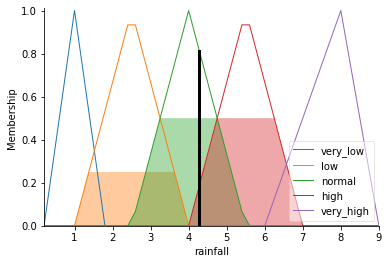

In [13]:
rain_fall= ctrl.ControlSystem([value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25])
rain_fall= ctrl.ControlSystemSimulation(rain_fall)
#Test Rainfall forecast
rain_fall.input['temp']= 30
rain_fall.input['wind_speed']=2
rain_fall.compute()
print('Rainfall forecast: ',rain_fall.output['rainfall'])
rainfall.view(sim = rain_fall)